# Experimental Design
***
## Angle Choice

Import the necessary packages and code for this application.

In [1]:
%matplotlib inline

import numpy as np
import sys
# Add to system path to access experimental design code.
sys.path.append('../experimental-design')

from refnx.reflect import SLD

from structures import Sample
from design import angle_choice_single

# Reduce size of plots for the notebook.
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

Next, define the structure (using refnx) that we want to find the optimal measurement angle(s) for.

In [2]:
# Defines a structure describing a simple sample.
air = SLD(0, name='Air')
layer1 = SLD(4, name='Layer 1')(thick=200, rough=2)
layer2 = SLD(6, name='Layer 2')(thick=6, rough=2)
substrate = SLD(2.047, name='Substrate')(thick=0, rough=2)

structure = air | layer1 | layer2 | substrate
structure.name = 'thin_layer_sample'

# Wrap the refnx structure in the custom Sample class for Fisher information framework.
sample = Sample(structure)

Define the inputs to the angle selection code.

In [3]:
# Path to directory to save results to.
save_path = './results'

# Number of data points to simulate.
points = 70

# Time to use for simulation.
time = 40

# Angles (in degrees) to consider.
angle_range = np.linspace(0.2, 2.3, 200)

***
### First Angle
First investigate the initial angle choice for the defined sample.

>>> 0/200
>>> 100/200
First angle: 2.3


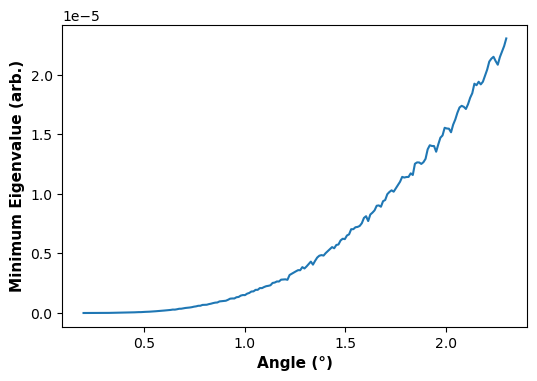

In [4]:
initial_angle_times = {} # No angles measured so far.
angle_1 = angle_choice_single(sample, initial_angle_times, angle_range, points, time, save_path, 'angle_choice_1')
print('First angle: {}'.format(round(angle_1, 2)))

***
### Second Angle
We can also look at subsequent angles. Assuming we have measured 2.3°, for this sample, it appears that measuring the same angle again is optimal. Although, there does seem to be some improvement in the low angle range.

>>> 0/200
>>> 100/200
Second angle: 2.3


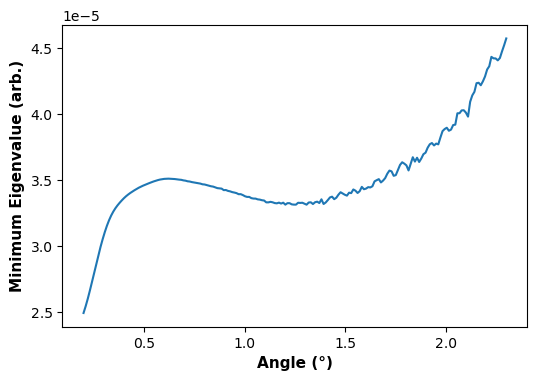

In [5]:
initial_angle_times = {2.3: (70, 40)} # Angle: (Points, Time) for first angle choice.
angle_2 = angle_choice_single(sample, initial_angle_times, angle_range, points, time, save_path, 'angle_choice_2')
print('Second angle: {}'.format(round(angle_2, 2)))